 Simple notebook for making plots and visualizing some simulation results of the tailassignment algorithms.

In [1]:
%load_ext autoreload
%autoreload 2

from plots import * 
from tailassignment_oop import *
from tqdm import tqdm
import os

In [2]:
# _Before_ running this notebook, run the script simulate.sh with a specified number 
# of routes and either 'high' or 'low' number of solutions to produce the data files

In [3]:
routes = 7
sols   = "high"

# Default argument given in run_single_sim.py
max_depth_i = 20
max_depth_b = 30

# Join the data for all the samples so it is easier to handle in the plots 
path_to_data = "../data/tailassignment_samples/npy_samples/"
files = []

for file in os.listdir(path_to_data):
    if file.startswith(f"FRCR_{routes}_24_") and file.endswith(".npy"):
        if sols == "high" and file.split('_')[-2] != '1':
            files.append(file)
        elif sols == "low" and file.split('_')[-2] == '1':
            files.append(file)
            
N = len(files)

In [4]:
SP_basic  = np.zeros((N,max_depth_b))
C_basic   = np.zeros((N,max_depth_b))
P_basic   = np.zeros((N,max_depth_b))

D_basic   = np.zeros(N)
NCx_basic = np.zeros(N)

SP_interlaced  = np.zeros((N,max_depth_i))
C_interlaced   = np.zeros((N,max_depth_i))
P_interlaced   = np.zeros((N,max_depth_i))

D_interlaced   = np.zeros(N)
NCx_interlaced = np.zeros(N)

for i,file in enumerate(files):
    file_sign = file.split('FRCR')[1]
    
    SP_basic[i,:] = np.load("../data/TAstatistics/SP_basic" + file_sign)
    C_basic[i,:] = np.load("../data/TAstatistics/C_basic" + file_sign)
    P_basic[i,:] = np.load("../data/TAstatistics/P_basic" + file_sign)
    D_basic[i] = np.load("../data/TAstatistics/D_basic" + file_sign)
    NCx_basic[i] = np.load("../data/TAstatistics/NCx_basic" + file_sign)
    
    SP_interlaced[i,:] = np.load("../data/TAstatistics/SP_interlaced" + file_sign)
    C_interlaced[i,:] = np.load("../data/TAstatistics/C_interlaced" + file_sign)
    P_interlaced[i,:] = np.load("../data/TAstatistics/P_interlaced" + file_sign)
    D_interlaced[i] = np.load("../data/TAstatistics/D_interlaced" + file_sign)
    NCx_interlaced[i] = np.load("../data/TAstatistics/NCx_interlaced" + file_sign)

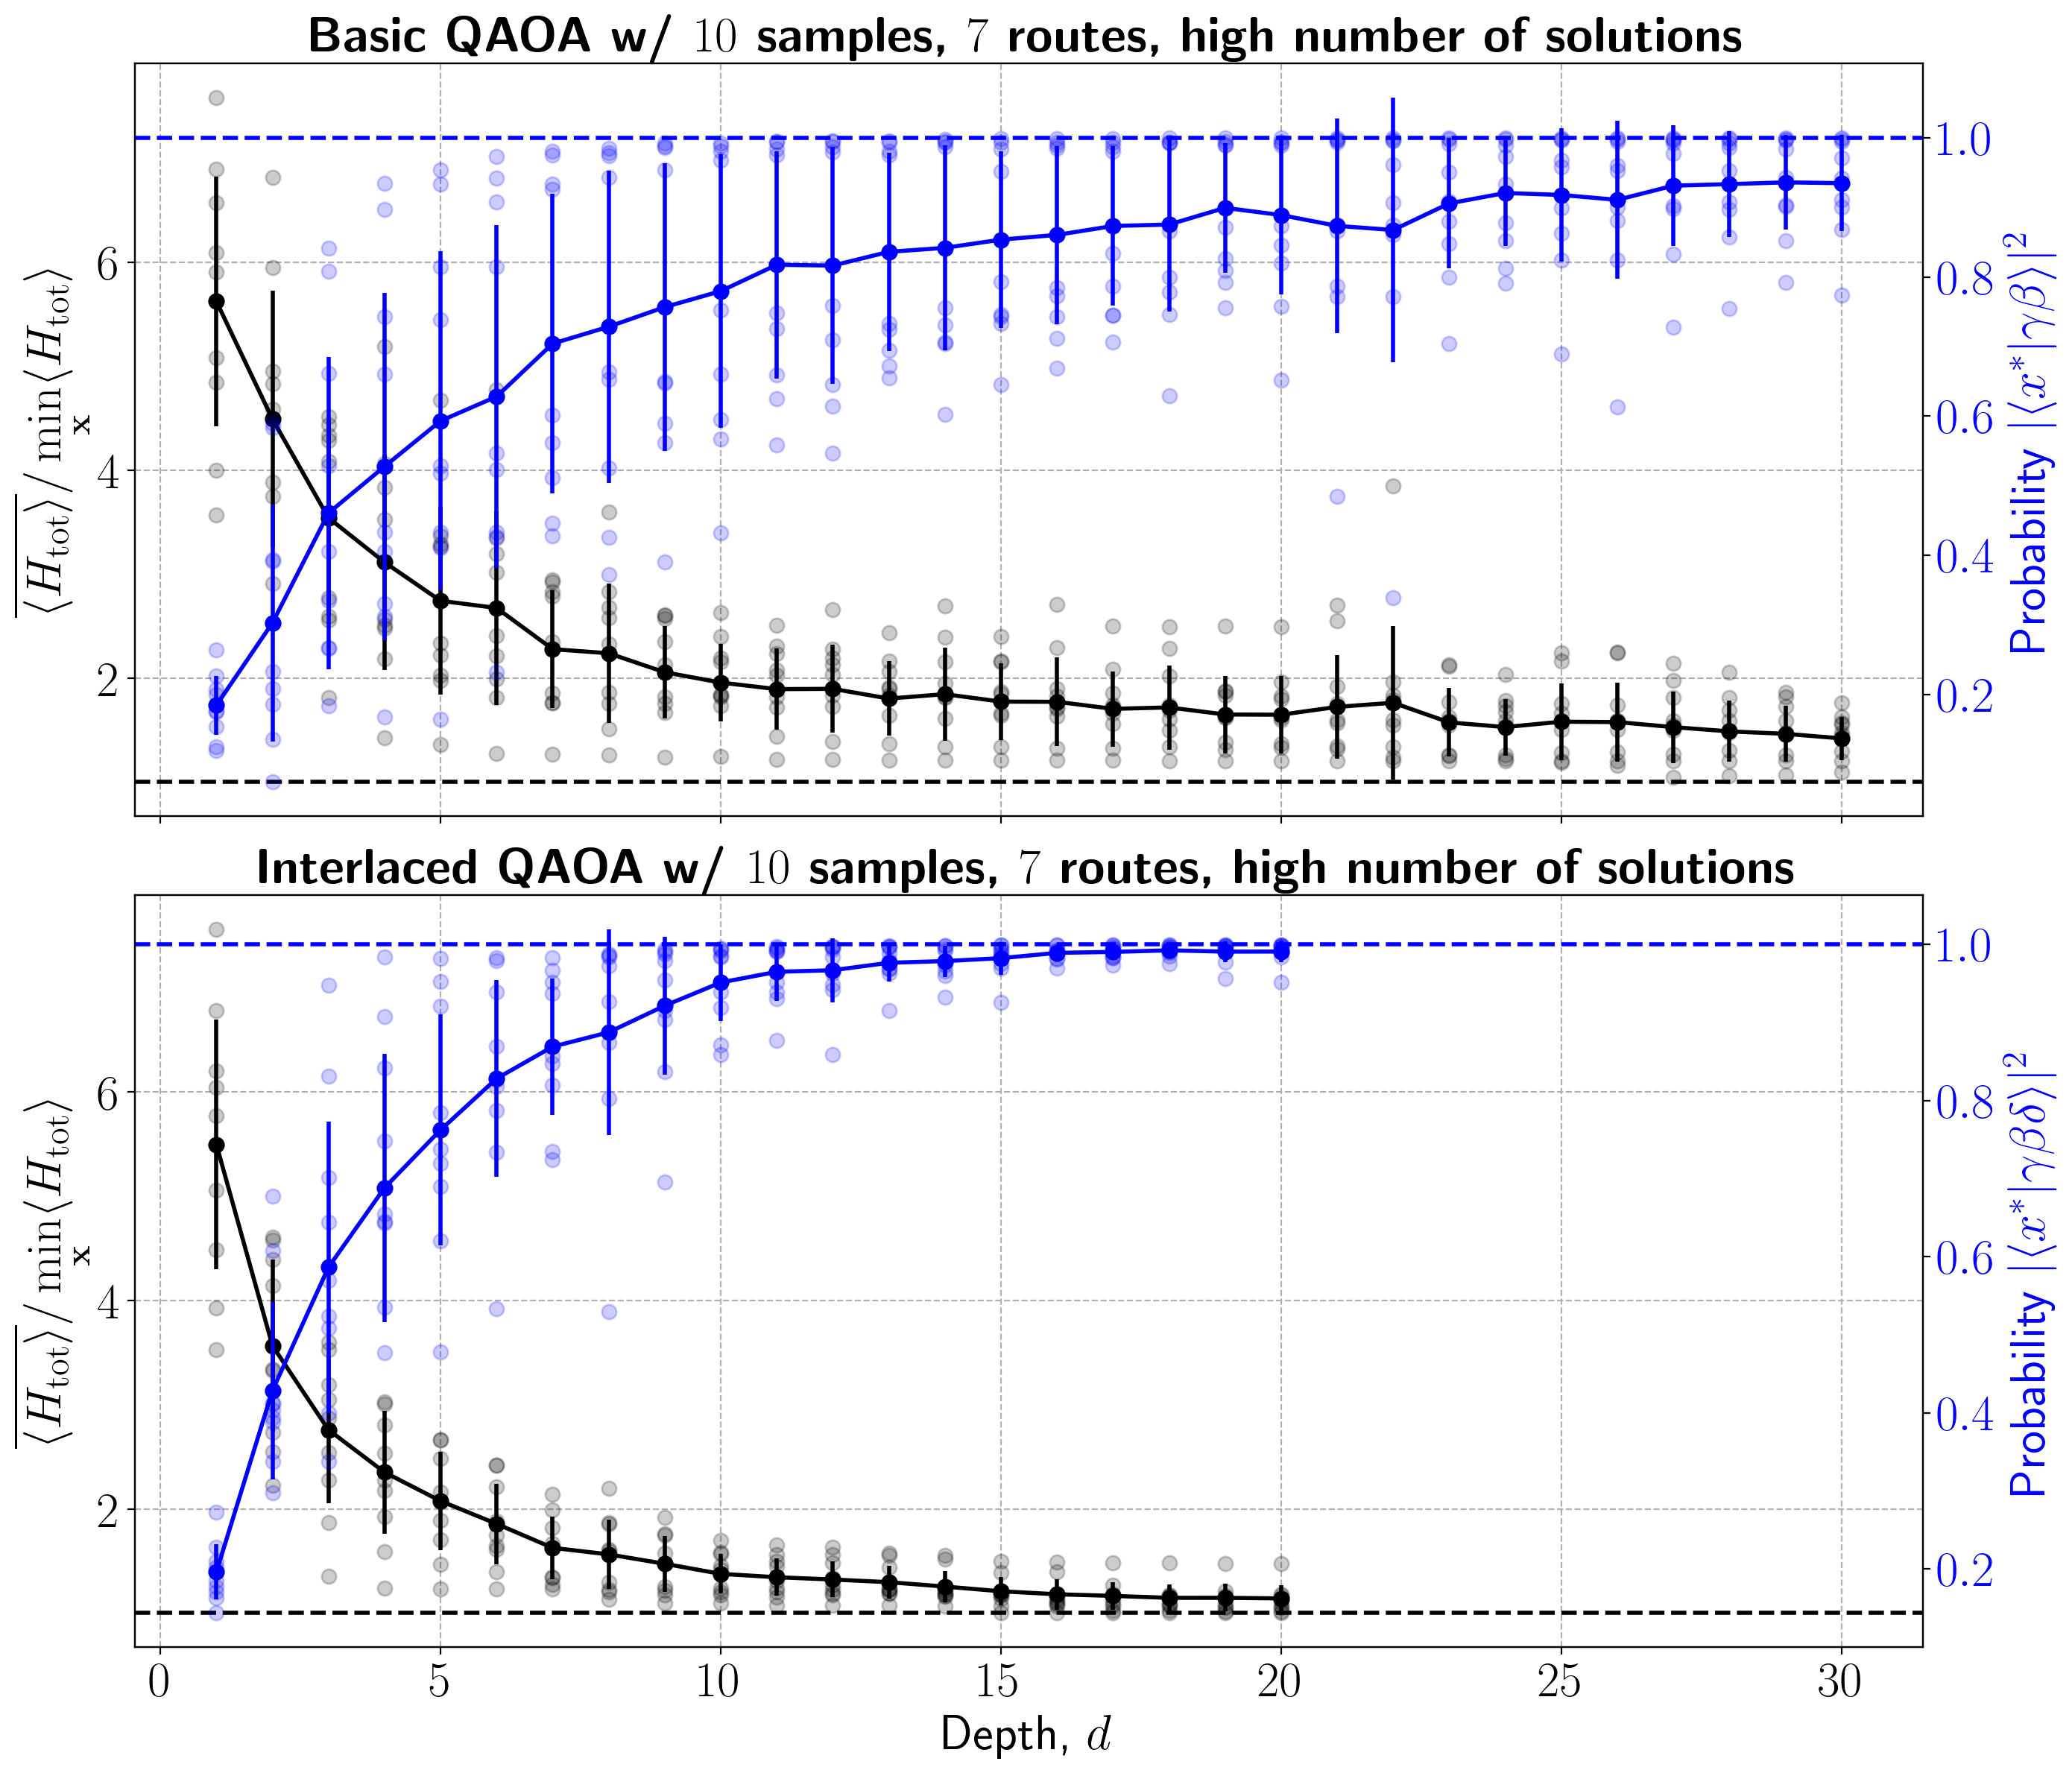

In [5]:
## Cost and success-probability as a function of algorithm depth for each 
## of the methods, including the error bars

Cerr_basic  = np.std(C_basic, axis = 0)
SPerr_basic = np.std(SP_basic, axis = 0)

Cerr_interlaced  = np.std(C_interlaced, axis = 0)
SPerr_interlaced = np.std(SP_interlaced, axis = 0)

I_i = np.arange(1, 1 + max_depth_i, 1)
I_b = np.arange(1, 1 + max_depth_b, 1)

fig, ax = plt.subplots(figsize  = (14,12), nrows = 2, sharex = True)

ax[0].set_title(r"\textbf{Basic QAOA w/ $%.i$ samples,  $%.i$ routes, %s number of solutions}" %(N,routes,sols))

ax[0].set_ylabel(r"$\overline{\langle H_{\mathrm{tot}} \rangle}/\min \limits_{\mathbf{x}} \langle H_{\mathrm{tot}} \rangle $", color = "black")
ax[0].axhline(1,color = "black", ls = "--")

#ax.plot(I, np.average(C_basic, axis = 0), marker = "o", color = "black")
ax[0].errorbar(I_b, np.average(C_basic, axis = 0), yerr=Cerr_basic, fmt='-o', color = "black")

for i in range(N):
    if i != 7:
        ax[0].plot(I_b, C_basic[i,:], 
            color = "black", ls = "", marker = "o", alpha = 0.2)

ax[0].grid(ls = "--")
#ax.set_yscale("log")

ax2 = ax[0].twinx()

#ax2.errorbar(I_b, np.average(SP_basic, axis = 0), marker='o', color = "blue")
ax2.errorbar(I_b, np.average(SP_basic, axis = 0), yerr=SPerr_basic, fmt='-o', color = "blue")

for i in range(N):
    if i != 7:
        ax2.plot(I_b, SP_basic[i,:], 
            color = "blue", ls = "", marker = "o", alpha = 0.2)

ax2.axhline(1,color = "blue", ls = "--")

ax2.tick_params(labelcolor = "blue")
ax2.set_ylabel(r"Probability $| \langle x^* \vert \gamma \beta \rangle |^2$", color = "blue")

ax[1].set_title(r"\textbf{Interlaced QAOA w/ $%.i$ samples,  $%.i$ routes, %s number of solutions}" %(N,routes,sols))

ax[1].set_ylabel(r"$\overline{\langle H_{\mathrm{tot}} \rangle}/\min \limits_{\mathbf{x}} \langle H_{\mathrm{tot}} \rangle $", color = "black")
ax[1].axhline(1,color = "black", ls = "--")

ax[1].errorbar(I_i, np.average(C_interlaced, axis = 0), yerr=Cerr_interlaced, fmt='-o', color = "black")

for i in range(N):
    if i != 7:
        ax[1].plot(I_i, C_interlaced[i,:], 
            color = "black", ls = "", marker = "o", alpha = 0.2)

ax[1].grid(ls = "--")
ax[1].set_xlabel("Depth, $d$")
#ax.set_yscale("log")

ax2 = ax[1].twinx()

ax2.errorbar(I_i, np.average(SP_interlaced, axis = 0), yerr=SPerr_interlaced, fmt='-o', color = "blue")

for i in range(N):
    if i != 7:
        ax2.plot(I_i, SP_interlaced[i,:], 
            color = "blue", ls = "", marker = "o", alpha = 0.2)

ax2.axhline(1,color = "blue", ls = "--")

ax2.tick_params(labelcolor = "blue")
ax2.set_ylabel(r"Probability $| \langle x^* \vert \gamma \beta \delta \rangle |^2$", color = "blue")

plt.tight_layout()

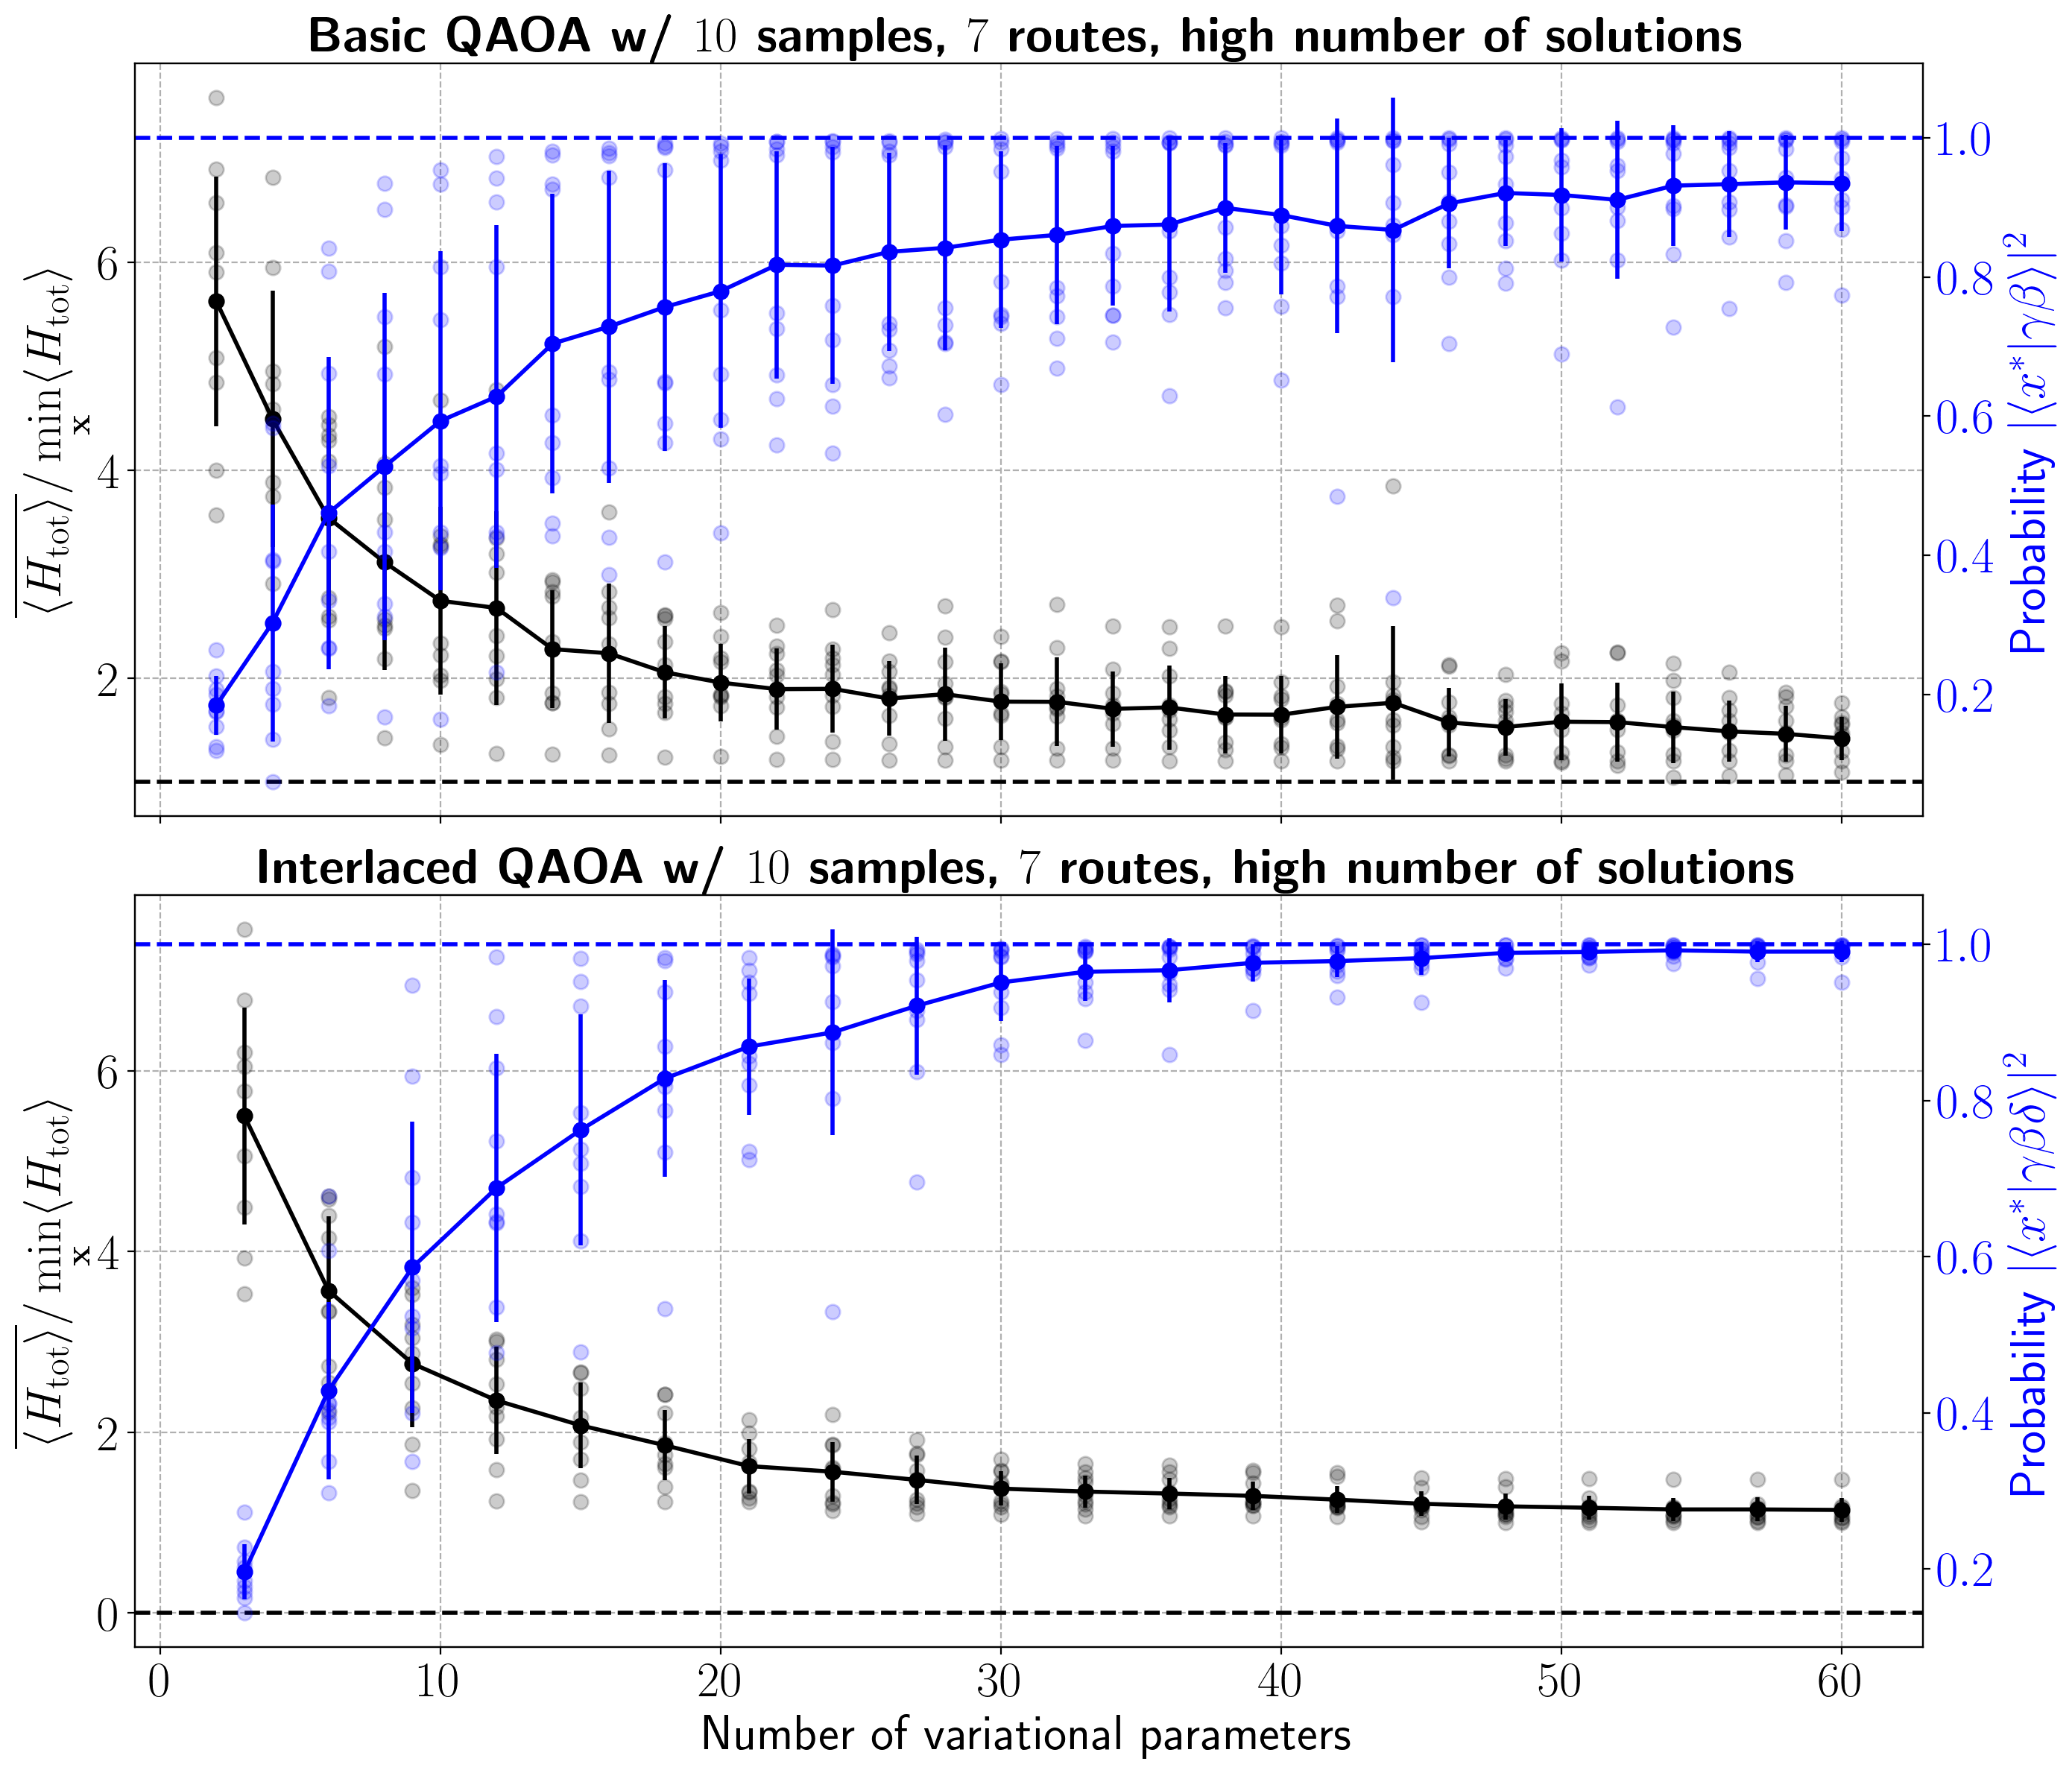

In [6]:
## Same as a bove but with number of optimization parameters on x-axis

fig, ax = plt.subplots(figsize  = (14,12), nrows = 2, sharex = True)

ax[0].set_title(r"\textbf{Basic QAOA w/ $%.i$ samples,  $%.i$ routes, %s number of solutions}" %(N,routes,sols))

ax[0].set_ylabel(r"$\overline{\langle H_{\mathrm{tot}} \rangle}/\min \limits_{\mathbf{x}} \langle H_{\mathrm{tot}} \rangle $", color = "black")
ax[0].axhline(1,color = "black", ls = "--")

#ax.plot(I, np.average(C_basic, axis = 0), marker = "o", color = "black")
ax[0].errorbar(I_b*2, np.average(C_basic, axis = 0), yerr=Cerr_basic, fmt='-o', color = "black")

for i in range(N):
    if i != 7:
        ax[0].plot(I_b*2, C_basic[i,:], 
            color = "black", ls = "", marker = "o", alpha = 0.2)

ax[0].grid(ls = "--")
#ax.set_yscale("log")

ax2 = ax[0].twinx()

#ax2.errorbar(I_b, np.average(SP_basic, axis = 0), marker='o', color = "blue")
ax2.errorbar(I_b*2, np.average(SP_basic, axis = 0), yerr=SPerr_basic, fmt='-o', color = "blue")

for i in range(N):
    if i != 7:
        ax2.plot(I_b*2, SP_basic[i,:], 
            color = "blue", ls = "", marker = "o", alpha = 0.2)

ax2.axhline(1,color = "blue", ls = "--")

ax2.tick_params(labelcolor = "blue")
ax2.set_ylabel(r"Probability $| \langle x^* \vert \gamma \beta \rangle |^2$", color = "blue")

ax[1].set_title(r"\textbf{Interlaced QAOA w/ $%.i$ samples,  $%.i$ routes, %s number of solutions}" %(N,routes,sols))

ax[1].set_ylabel(r"$\overline{\langle H_{\mathrm{tot}} \rangle}/\min \limits_{\mathbf{x}} \langle H_{\mathrm{tot}} \rangle $", color = "black")
ax[1].axhline(color = "black", ls = "--")

ax[1].errorbar(I_i*3, np.average(C_interlaced, axis = 0), yerr=Cerr_interlaced, fmt='-o', color = "black")

for i in range(N):
    if i != 7:
        ax[1].plot(I_i*3, C_interlaced[i,:], 
            color = "black", ls = "", marker = "o", alpha = 0.2)

ax[1].grid(ls = "--")
ax[1].set_xlabel("Number of variational parameters")
#ax.set_yscale("log")

ax2 = ax[1].twinx()

ax2.errorbar(I_i*3, np.average(SP_interlaced, axis = 0), yerr=SPerr_interlaced, fmt='-o', color = "blue")

for i in range(N):
    if i != 7:
        ax2.plot(I_i*3, SP_interlaced[i,:], 
            color = "blue", ls = "", marker = "o", alpha = 0.2)

ax2.axhline(1,color = "blue", ls = "--")

ax2.tick_params(labelcolor = "blue")
ax2.set_ylabel(r"Probability $| \langle x^* \vert \gamma \beta \delta \rangle |^2$", color = "blue")

plt.tight_layout()

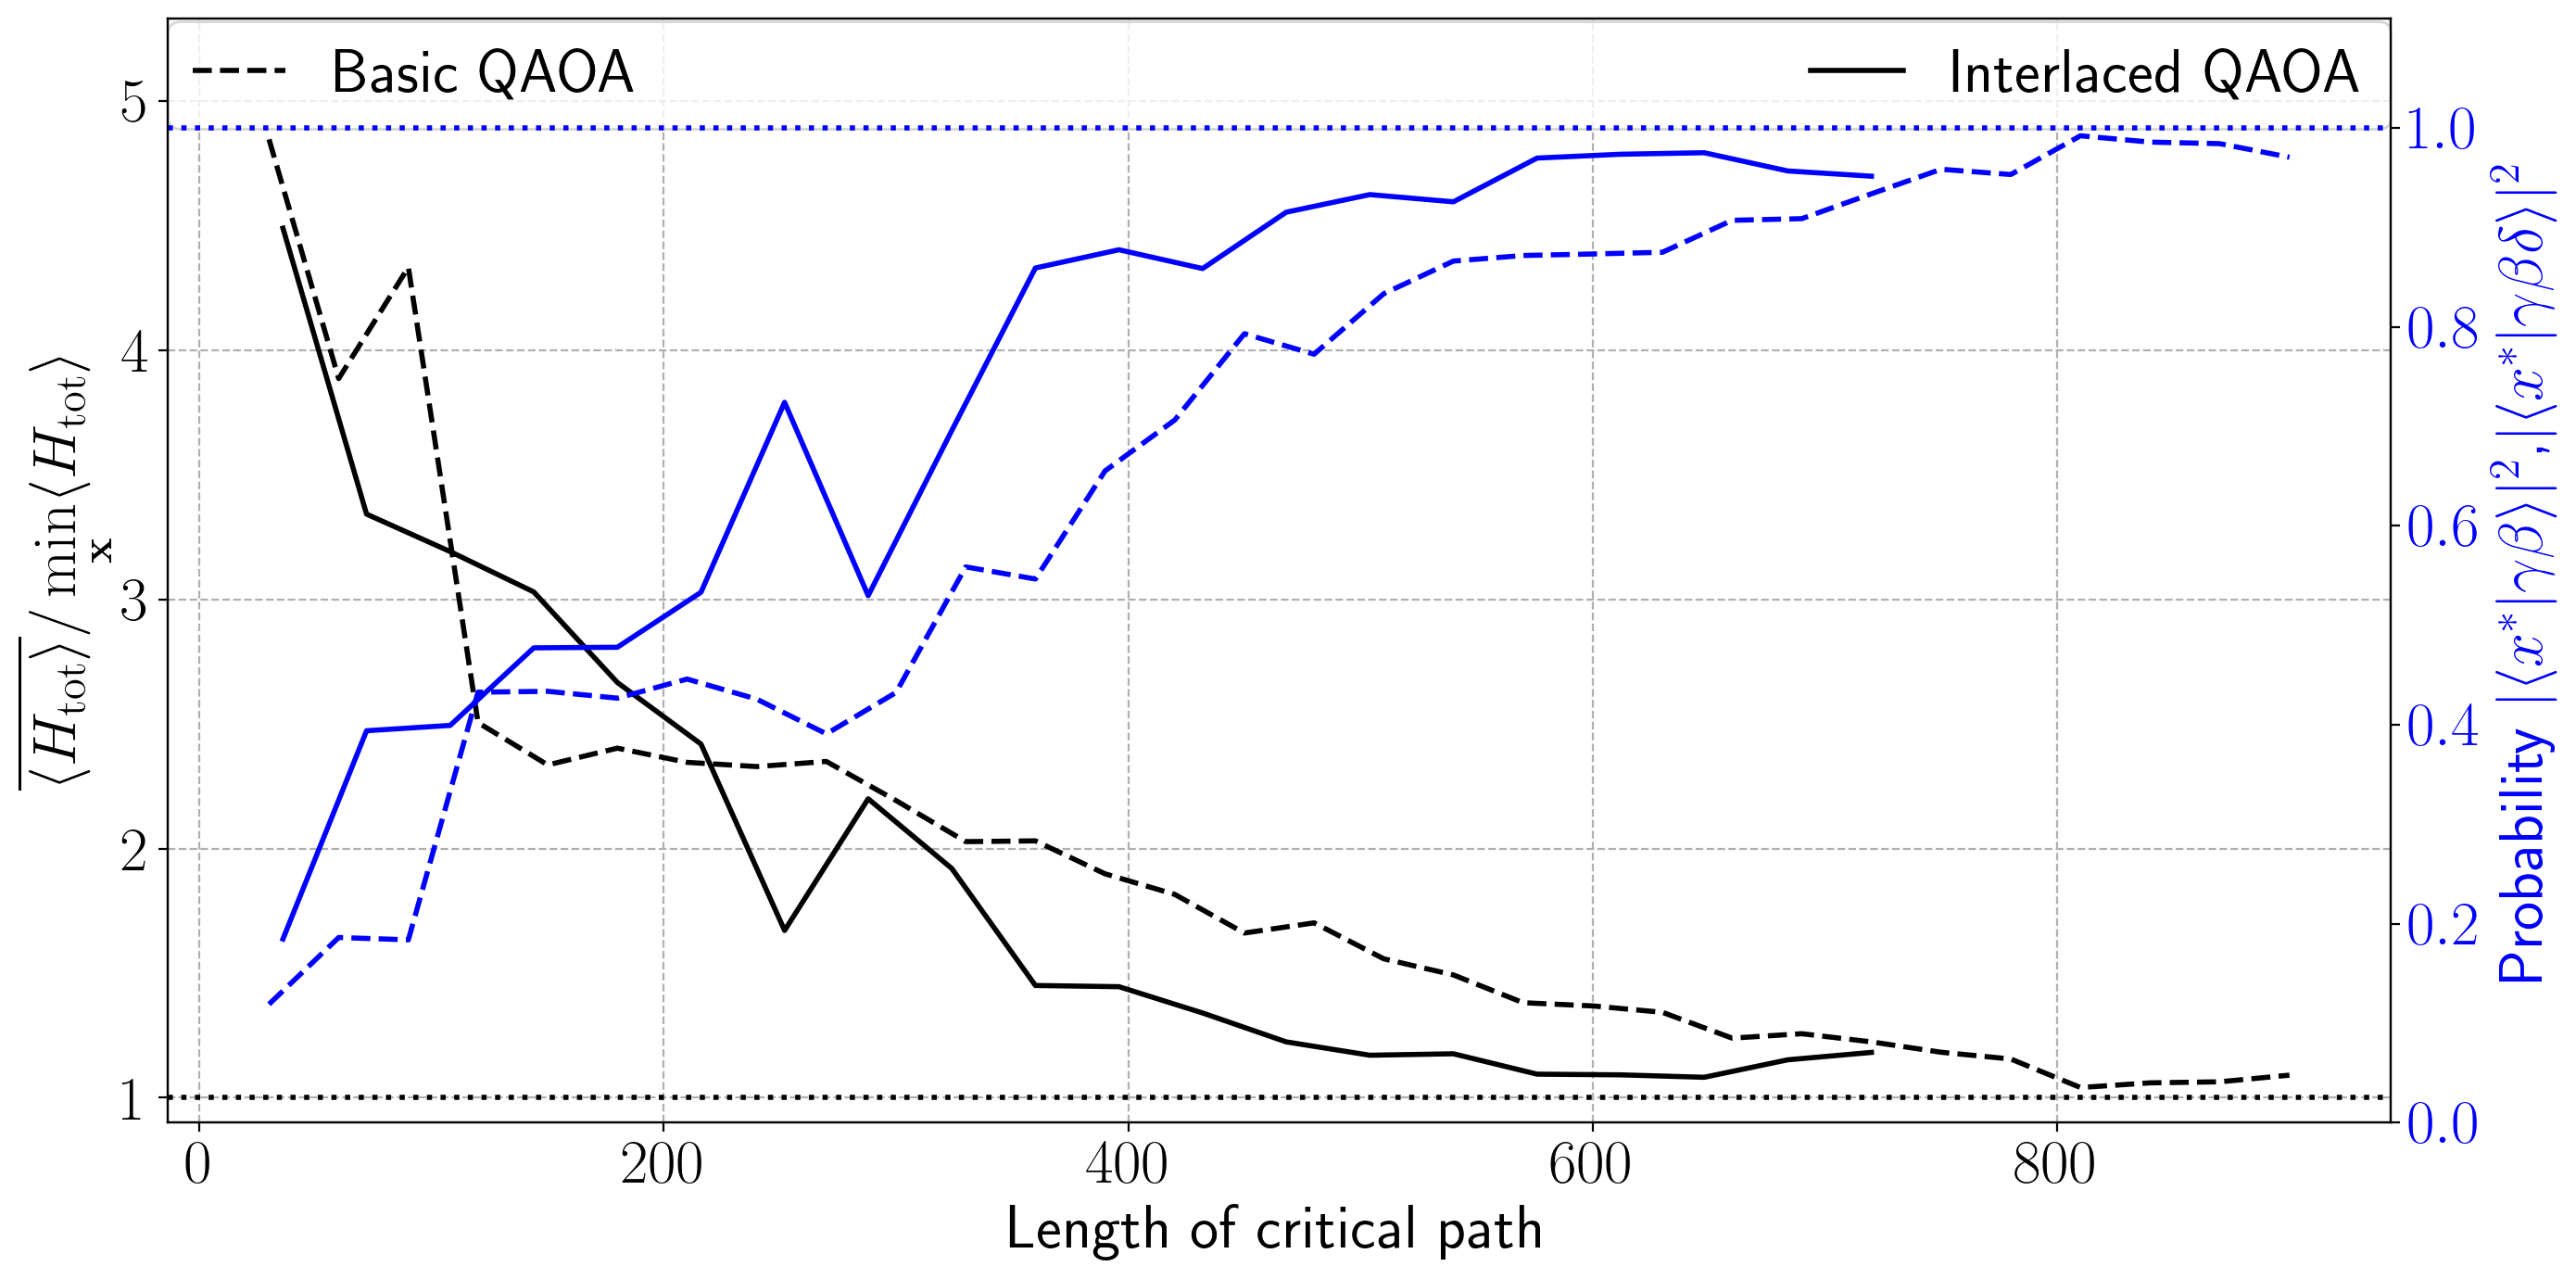

In [8]:
## Same as above, but only showing one of the examples, and scaling the x-axis with the 
## One-layer depth of the circuit

fig, ax = plt.subplots(figsize  = (14,7) )

ax.set_ylabel(r"$\overline{\langle H_{\mathrm{tot}} \rangle}/\min \limits_{\mathbf{x}} \langle H_{\mathrm{tot}} \rangle $", color = "black")

ax.plot(I_b * D_basic[6], C_basic[6], color = "black", ls = "--", label = "Basic QAOA")
#ax[0].errorbar(I, np.average(C_basic, axis = 0), yerr=Cerr_basic, fmt='-o', color = "black")
ax.plot(I_i * D_interlaced[6], C_interlaced[6], color = "black", label = "Interlaced QAOA")

ax.axhline(y = 1, color = "black", ls = ":")
ax.grid(ls = "--")
#ax.set_yscale("log")

ax.set_xlabel(r"Length of critical path")
ax2 = plt.twinx()

#ax2.errorbar(I, np.average(SP_basic, axis = 0), marker='o', color = "blue")
ax2.plot(I_b * D_basic[6],SP_basic[6], color = "blue", ls = "--")
ax2.plot(I_i * D_interlaced[6], SP_interlaced[6], color = "blue")

ax2.tick_params(labelcolor = "blue")
ax2.set_ylabel(r"Probability $|\langle x^* \vert \gamma \beta \rangle |^2$,$| \langle x^* \vert \gamma \beta \delta \rangle |^2$", color = "blue")
ax2.axhline(y = 1, color = "blue", ls = ":")

ax2.set_ylim([0,1.11])
ax.set_ylim([0.9,np.max([C_basic[6,0],C_interlaced[6,0]])*1.1])

plt.tight_layout()
ax.legend(bbox_to_anchor=(0., 0.9, 1., 0.1), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

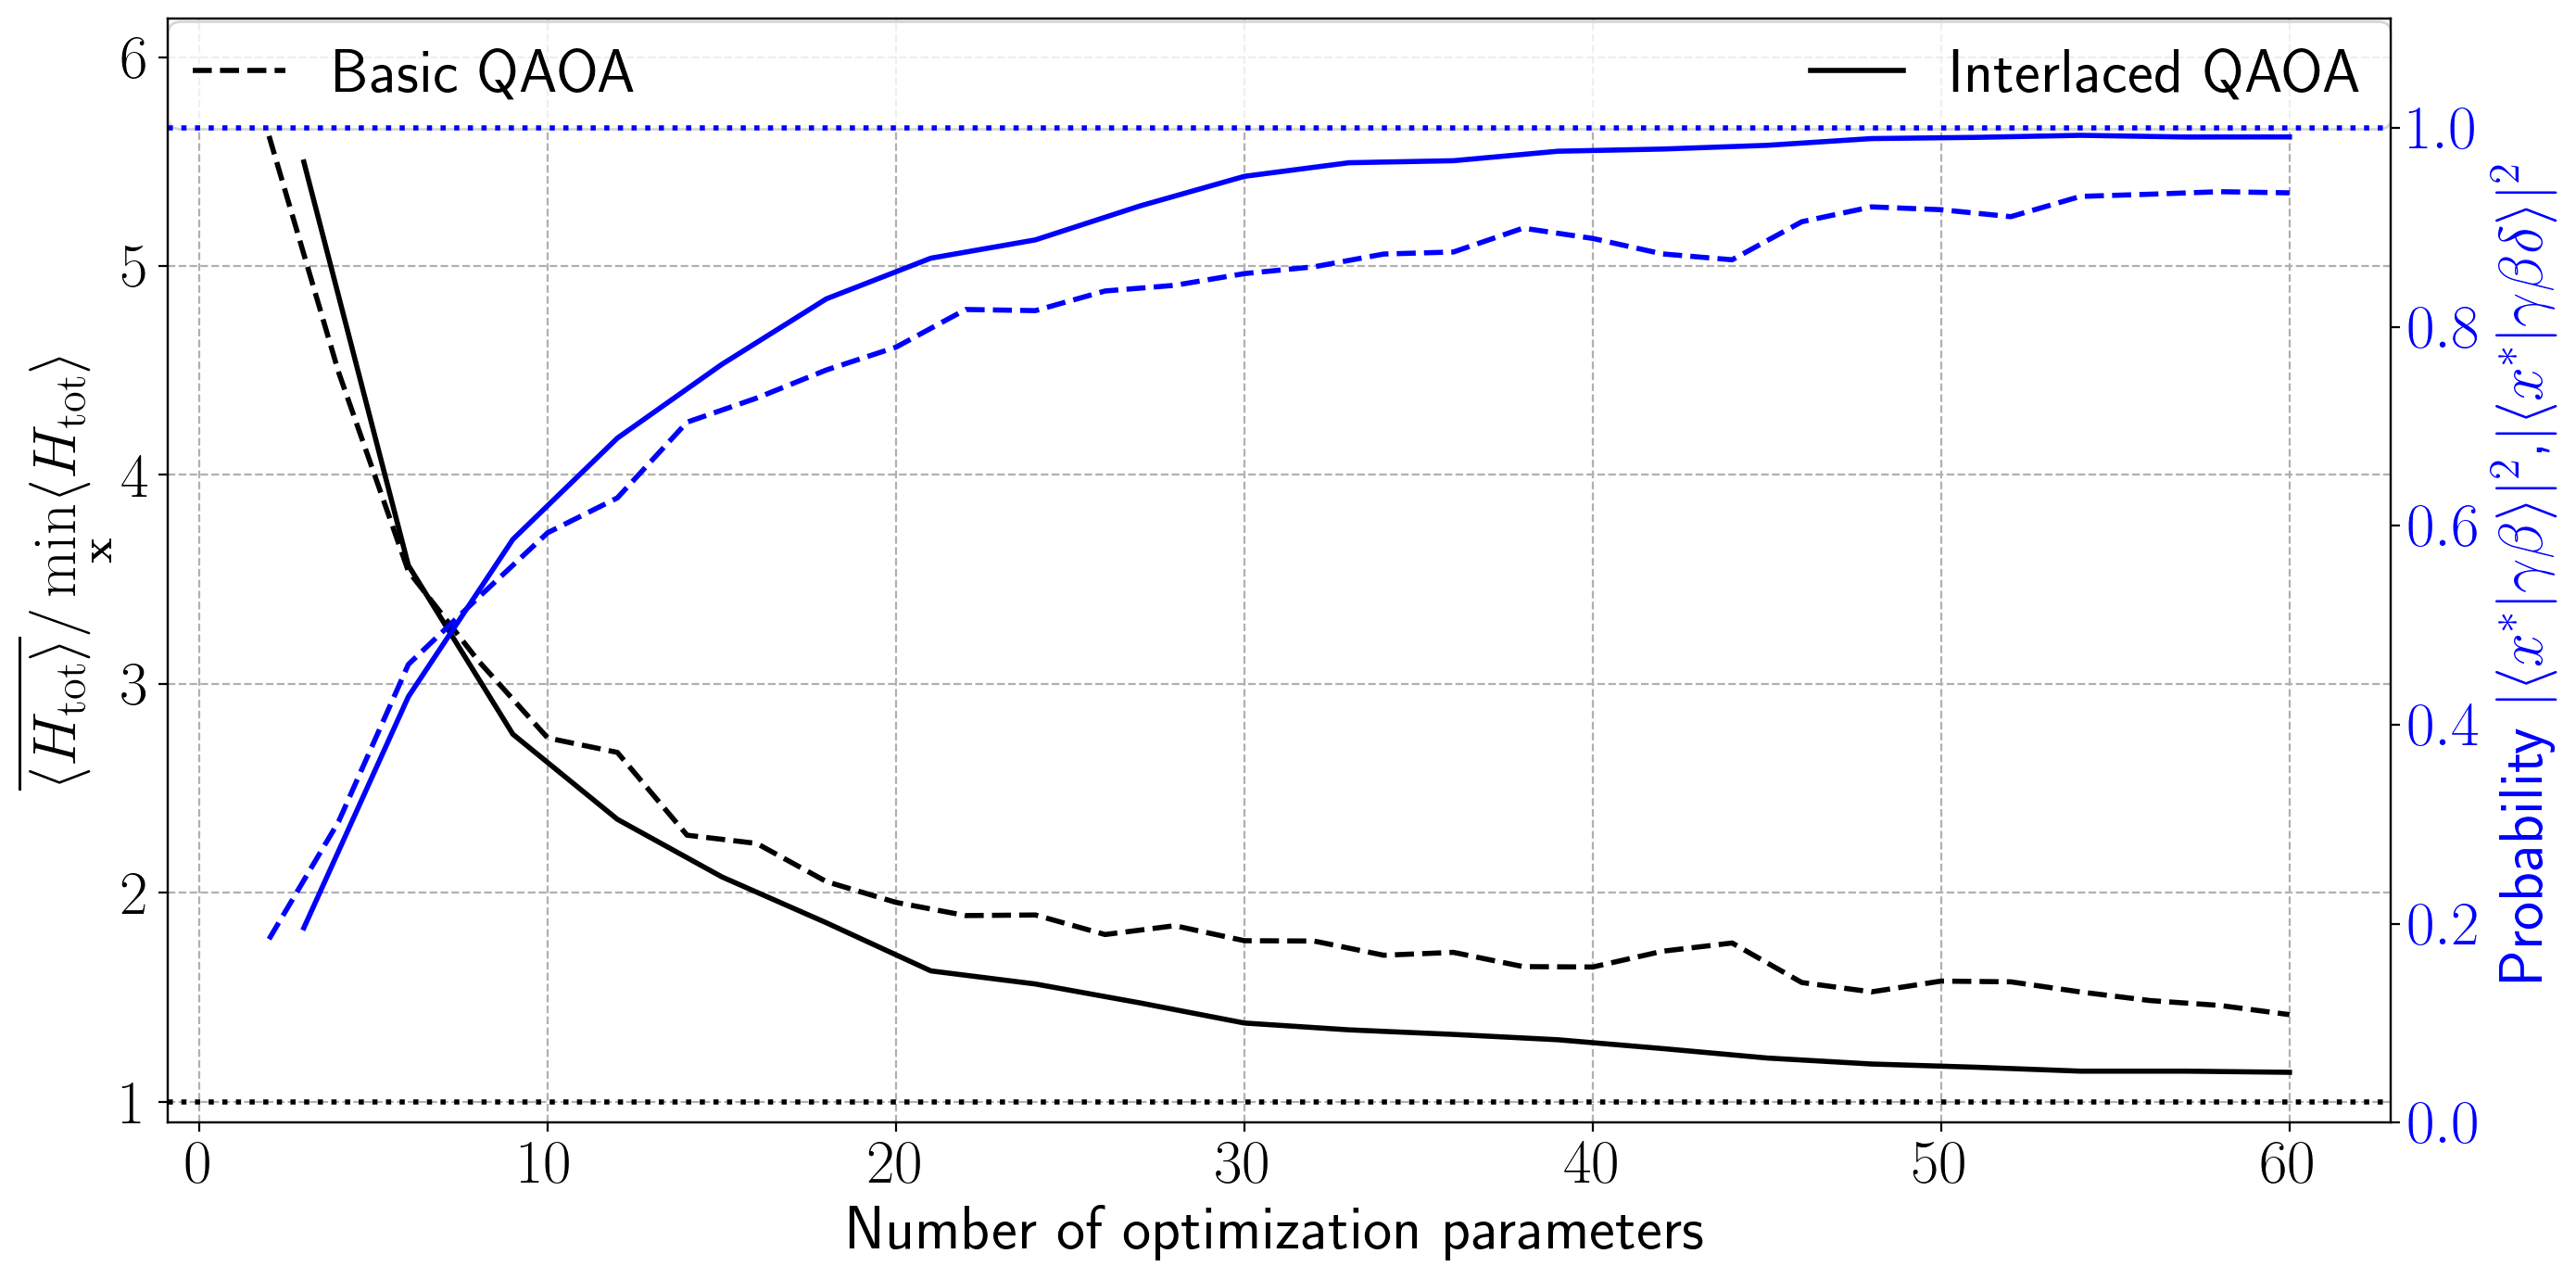

In [9]:
## Average of all simulations, now as a function of the number of optimisation parameters

fig, ax = plt.subplots(figsize  = (14,7) )

ax.set_ylabel(r"$\overline{\langle H_{\mathrm{tot}} \rangle}/\min \limits_{\mathbf{x}} \langle H_{\mathrm{tot}} \rangle $", color = "black")

ax.plot(I_b * 2,np.average( C_basic[:,:], axis = 0), color = "black", ls = "--", label = "Basic QAOA")
#ax[0].errorbar(I, np.average(C_basic, axis = 0), yerr=Cerr_basic, fmt='-o', color = "black")
ax.plot(I_i * 3, np.average(C_interlaced, axis = 0), color = "black", label = "Interlaced QAOA")

ax.axhline(y = 1, color = "black", ls = ":")
ax.grid(ls = "--")
#ax.set_yscale("log")

ax.set_xlabel(r"Number of optimization parameters")
ax2 = plt.twinx()

#ax2.errorbar(I, np.average(SP_basic, axis = 0), marker='o', color = "blue")
ax2.plot(I_b * 2,np.average(SP_basic, axis = 0), color = "blue", ls = "--")
ax2.plot(I_i * 3,np.average(SP_interlaced,axis = 0), color = "blue")

ax2.tick_params(labelcolor = "blue")
ax2.set_ylabel(r"Probability $|\langle x^* \vert \gamma \beta \rangle |^2$,$| \langle x^* \vert \gamma \beta \delta \rangle |^2$", color = "blue")
ax2.axhline(y = 1, color = "blue", ls = ":")

ax2.set_ylim([0,1.11])
ax.set_ylim([0.9,np.max([np.average(C_basic[:,0]),np.average(C_interlaced[:,0])])*1.1])

plt.tight_layout()
ax.legend(bbox_to_anchor=(0., 0.9, 1., 0.1), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

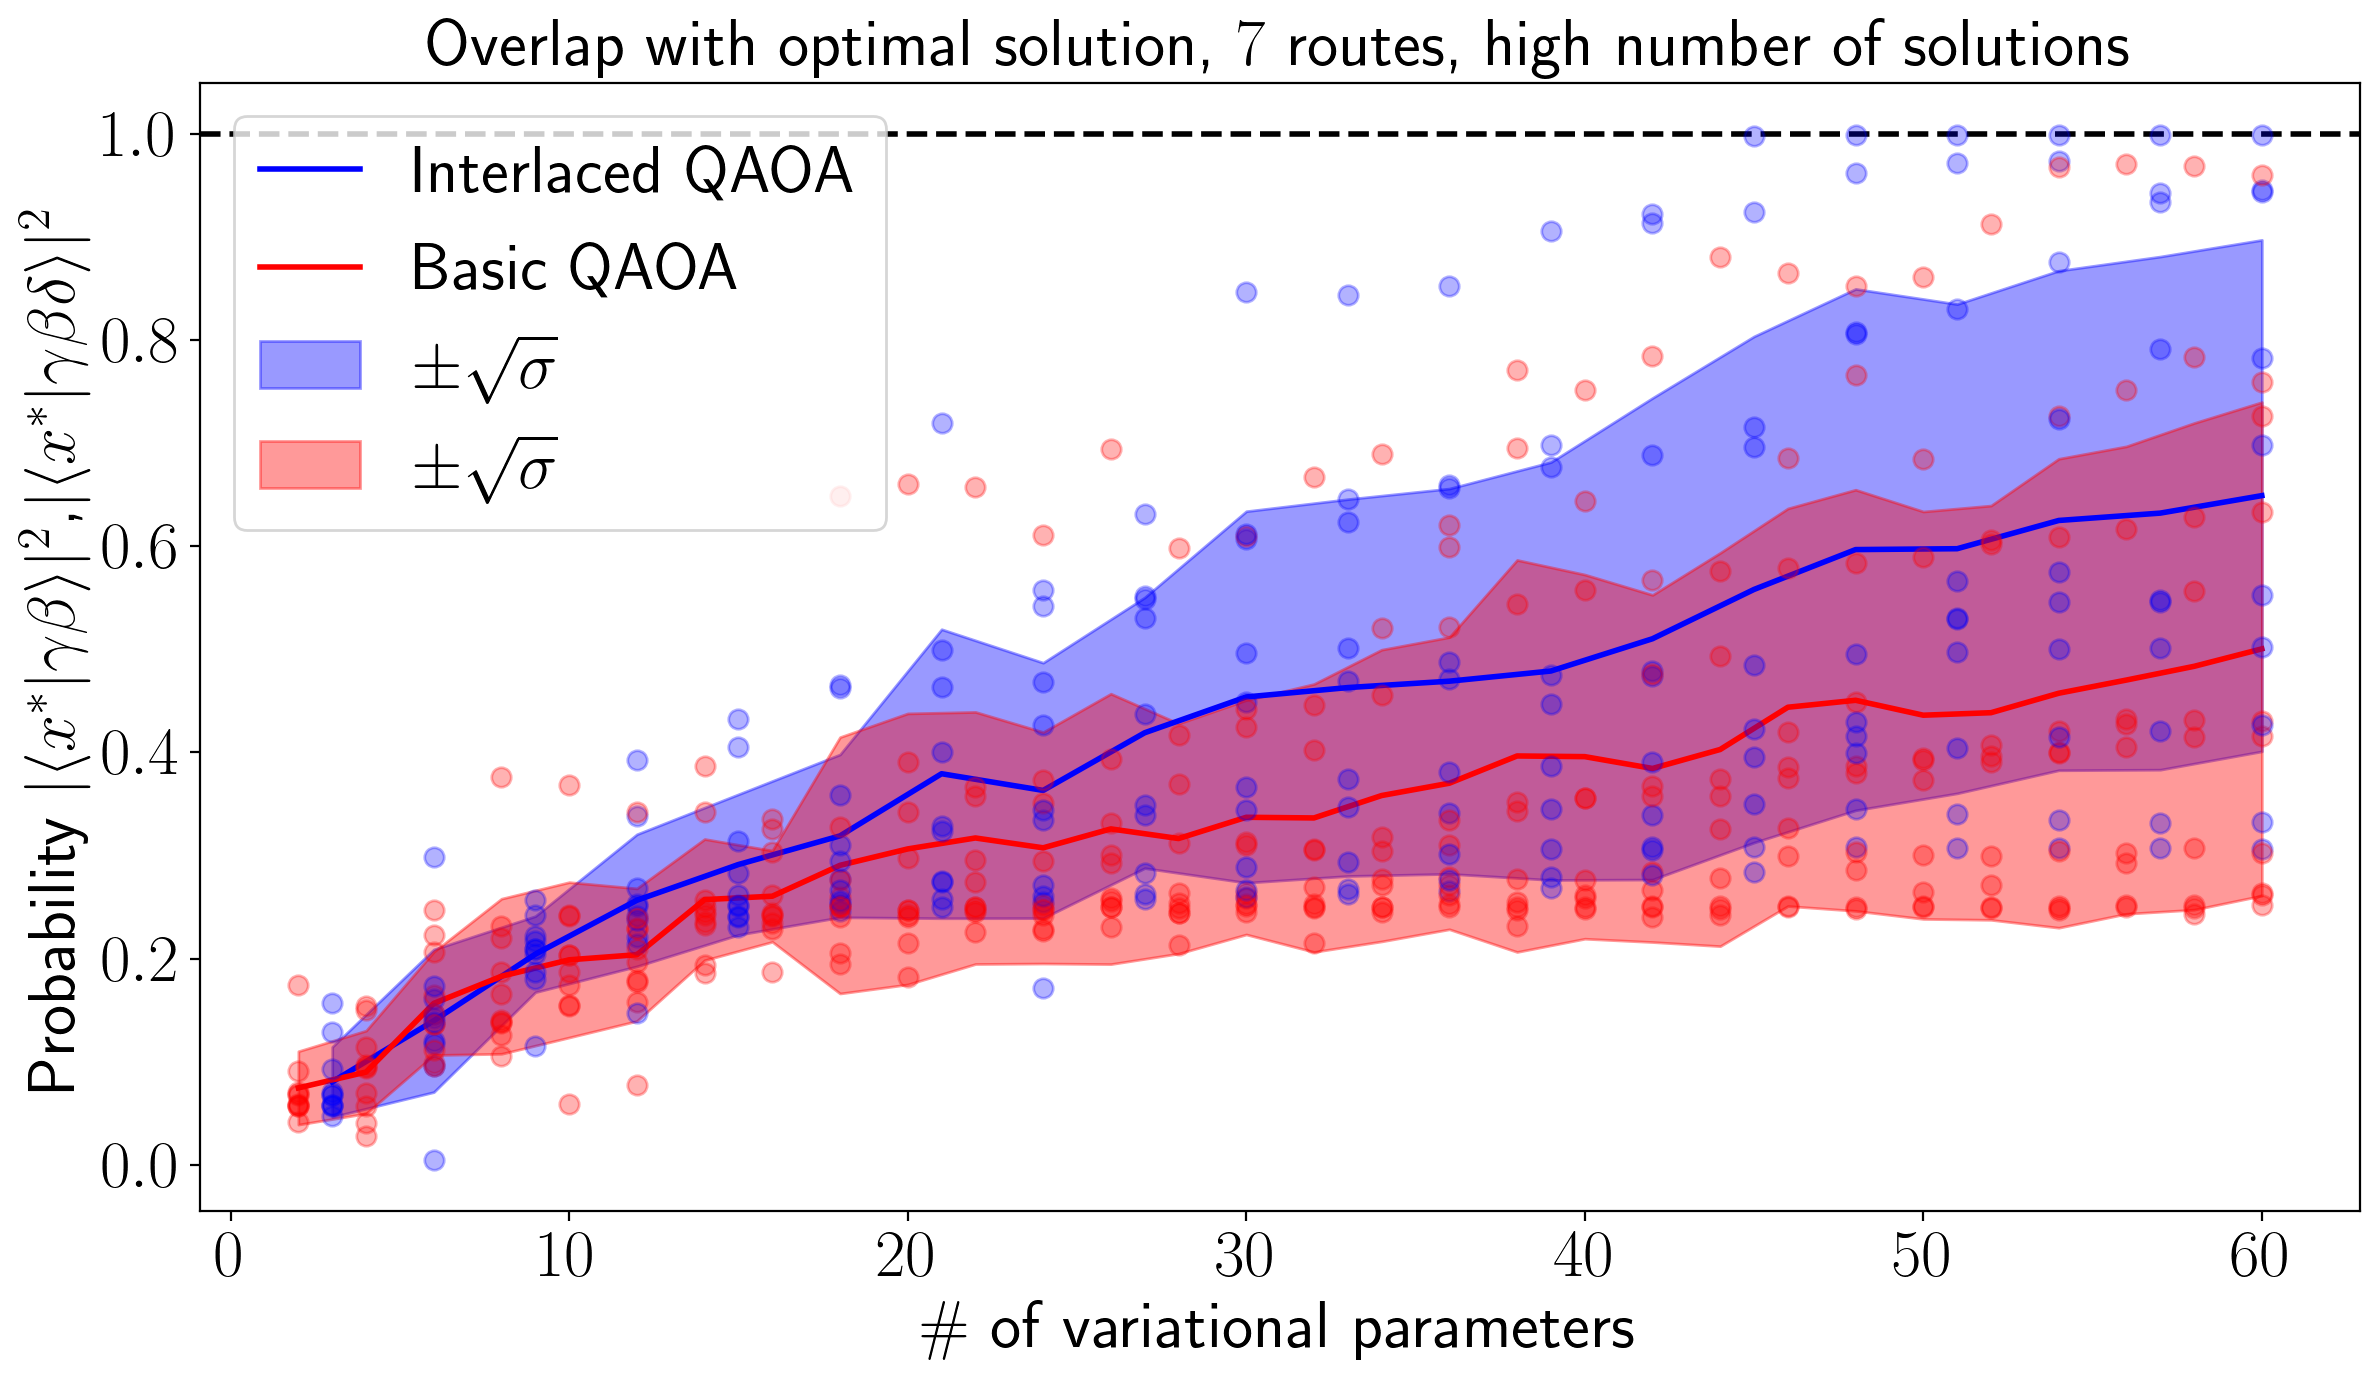

In [20]:
## Overlap with optimal solution, comparison

fig, ax = plt.subplots()

plt.title(r"Overlap with optimal solution, $%.i$ routes, high number of solutions"%routes)

P_i = np.average(P_interlaced, axis = 0)
P_b = np.average(P_basic, axis = 0)

plt.plot(I_i*3 , P_i, color = "blue", label = "Interlaced QAOA")
plt.plot(I_b*2 , P_b, color ="red",   label = "Basic QAOA")

upper_bound_I = P_i + np.std(P_interlaced, axis = 0)
lower_bound_I = P_i - np.std(P_interlaced, axis = 0)

upper_bound_B = P_b + np.std(P_basic, axis = 0)
lower_bound_B = P_b - np.std(P_basic, axis = 0)

ax.axhline(1, color  = "black", ls = "--")

for i in range(N):
    plt.plot(I_i*3 , P_interlaced[i], color  ="blue", alpha = 0.3, ls = "", marker ="o")
    plt.plot(I_b*2 , P_basic[i,], color  ="red", alpha = 0.3, ls = "", marker = "o")
    
plt.fill_between(I_i*3, lower_bound_I, upper_bound_I, color ="blue", alpha = 0.4 , label = r"$\pm \sqrt{\sigma}$")    
plt.fill_between(I_b*2, lower_bound_B, upper_bound_B, color ="red", alpha = 0.4, label = r"$\pm \sqrt{\sigma}$")  

ax.set_ylabel(r"Probability $|\langle x^* \vert \gamma \beta \rangle |^2$,$| \langle x^* \vert \gamma \beta \delta \rangle |^2$")
ax.set_xlabel(r"\# of variational parameters")

plt.legend()
plt.tight_layout()

In [15]:
FR = np.array([[1,0,1],[0,1,1]])
CR = np.array([1,1,1])

mu = 10

# Create new options and simulation_args dictionaries for 
# the 3-parameter version

Aer.backends()
backend = Aer.get_backend('statevector_simulator')

options={}
options['FR'] = FR
options['CR'] = CR
options['mu'] = mu
options['usebarrier'] = True

beta_n    = 5
gamma_n   = 50
delta_n   = 50

beta_max  = np.pi
gamma_max = 2 * np.pi
delta_max = 2 * np.pi

optmethod = 'Nelder-Mead'        
#shots     = 1024 # no need for shots when using the statevector simulation
rerun     = True
max_depth  = 1

simulation_args = dict()

simulation_args['backend']   = backend
simulation_args['optmethod'] = optmethod
simulation_args['max_depth'] = max_depth
simulation_args['repeats']   = 1
simulation_args['params_ll'] = np.array([0,0,0])
simulation_args['params_ul'] = np.array([gamma_max,beta_max,delta_max])
simulation_args['params_n']  = np.array([gamma_n, beta_n, delta_n])

qaoa_interlaced = TailAssignmentInterlaced(options)
Elandscape, params, E, best = qaoa_interlaced.simulate(**simulation_args);

Calculating energy landscape ...
Calculating energy landscape done.
Depth = 1, Rep = 1
Optimization terminated successfully.
         Current function value: 4.993368
         Iterations: 20
         Function evaluations: 37
P = [2.09293349 1.17910155 6.17265363]
P_ = [2.09293349 1.17910155 6.17265363 2.09293349 1.17910155 6.17265363]


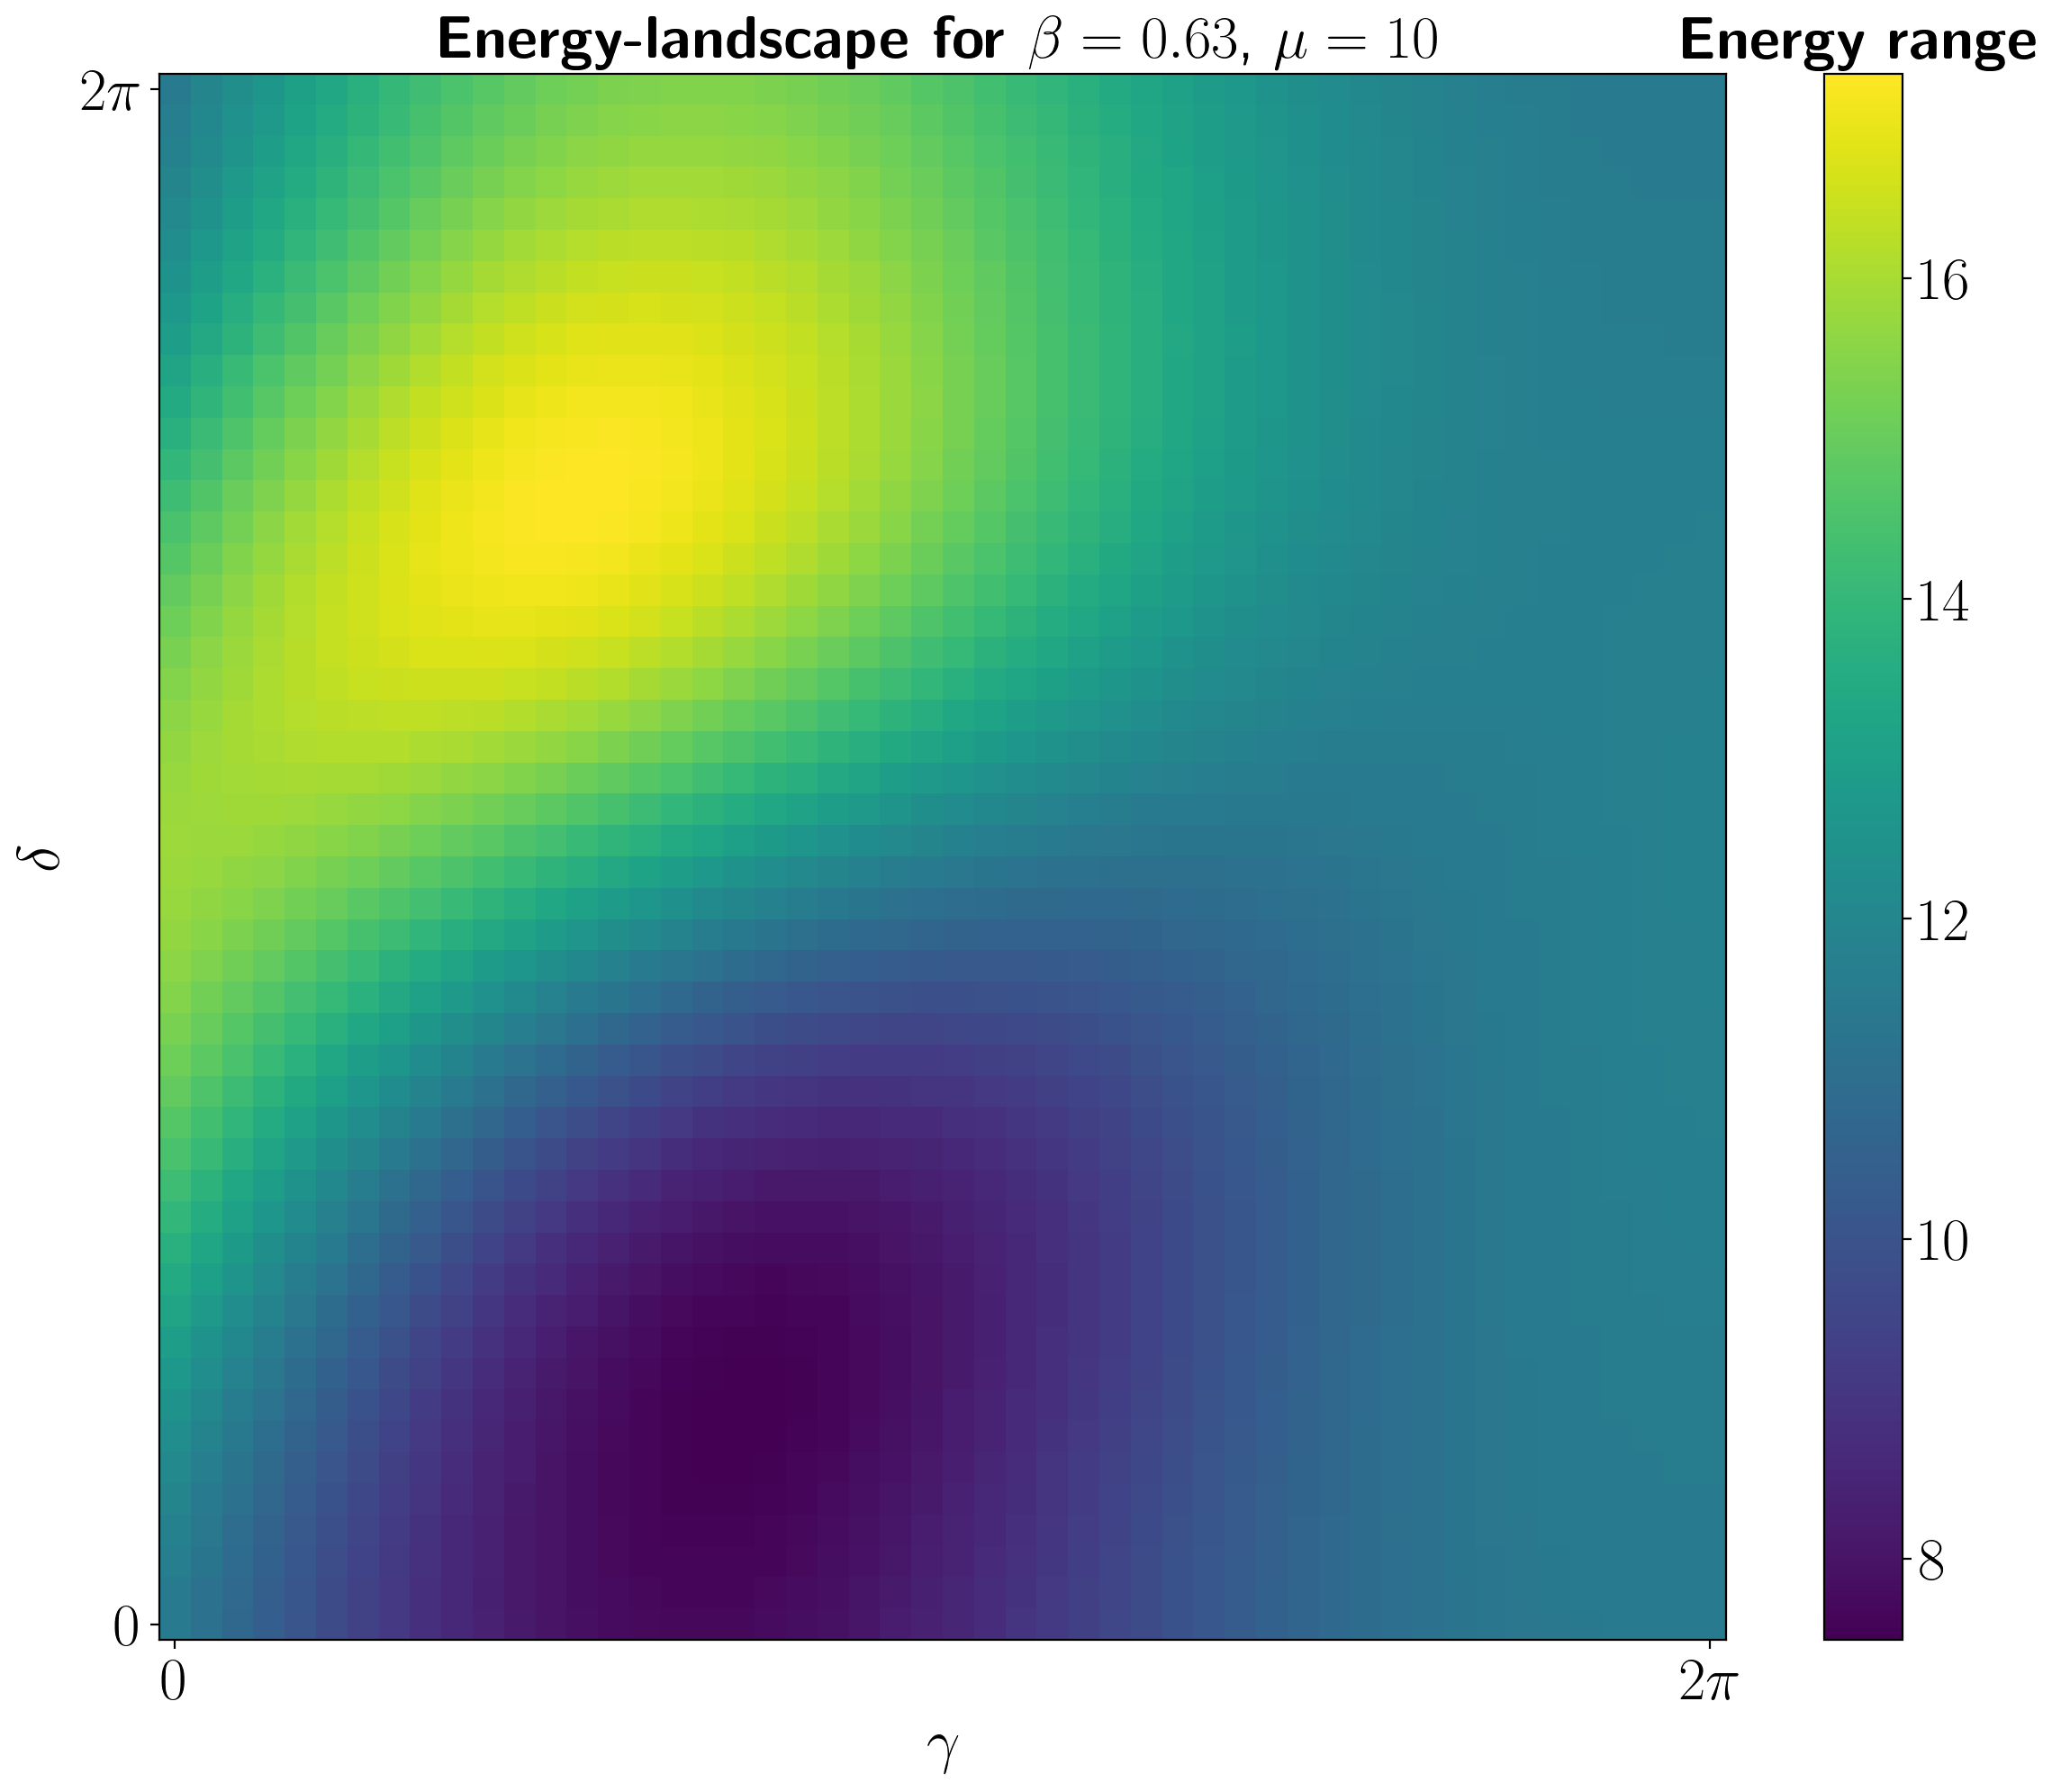

In [16]:
i = 1
from mpl_toolkits.axes_grid1 import make_axes_locatable

shiftg=gamma_max/(2*gamma_n)
shiftb=delta_max/(2*delta_n)

fig, ax = plt.subplots(figsize=(12,10));

plt.title(r"\textbf{Energy-landscape for }$\beta = %.2f$, $\mu = %.i$" %(i * beta_max/beta_n, mu))

plt.imshow(Elandscape[:,i,:],
          interpolation='nearest',
          origin='lower',
          extent=[-shiftg,gamma_max+shiftg,-shiftb,delta_max+shiftb], 
          aspect=1)

plt.xticks([0,gamma_max], ['$0$', r'$2\pi$'])
plt.yticks([0,delta_max], ['$0$', r'$2\pi$'])
plt.xlabel('$\gamma$',loc='center')
plt.ylabel(r'$\delta$',loc='center')

clb = plt.colorbar(orientation="vertical")
clb.ax.set_title(r'\textbf{Energy range}')
cmap = plt.get_cmap('bwr')

plt.tight_layout()

In [17]:
# Run same as above with mu = 1

mu = 1
Aer.backends()
backend = Aer.get_backend('statevector_simulator')

options={}
options['FR'] = FR
options['CR'] = CR
options['mu'] = mu
options['usebarrier'] = True

beta_n    = 5
gamma_n   = 50
delta_n   = 50

beta_max  = np.pi
gamma_max = 2 * np.pi
delta_max = 2 * np.pi

optmethod = 'Nelder-Mead'        
#shots     = 1024 # no need for shots when using the statevector simulation
rerun     = True
max_depth  = 1

simulation_args = dict()

simulation_args['backend']   = backend
simulation_args['optmethod'] = optmethod
simulation_args['max_depth'] = max_depth
simulation_args['repeats']   = 1
simulation_args['params_ll'] = np.array([0,0,0])
simulation_args['params_ul'] = np.array([gamma_max,beta_max,delta_max])
simulation_args['params_n']  = np.array([gamma_n, beta_n, delta_n])

qaoa_interlaced = TailAssignmentInterlaced(options)
Elandscape_, params, E, best = qaoa_interlaced.simulate(**simulation_args)

Calculating energy landscape ...
Calculating energy landscape done.
Depth = 1, Rep = 1
Optimization terminated successfully.
         Current function value: 1.679645
         Iterations: 24
         Function evaluations: 41
P = [1.83648133 1.24175538 4.94197134]
P_ = [1.83648133 1.24175538 4.94197134 1.83648133 1.24175538 4.94197134]


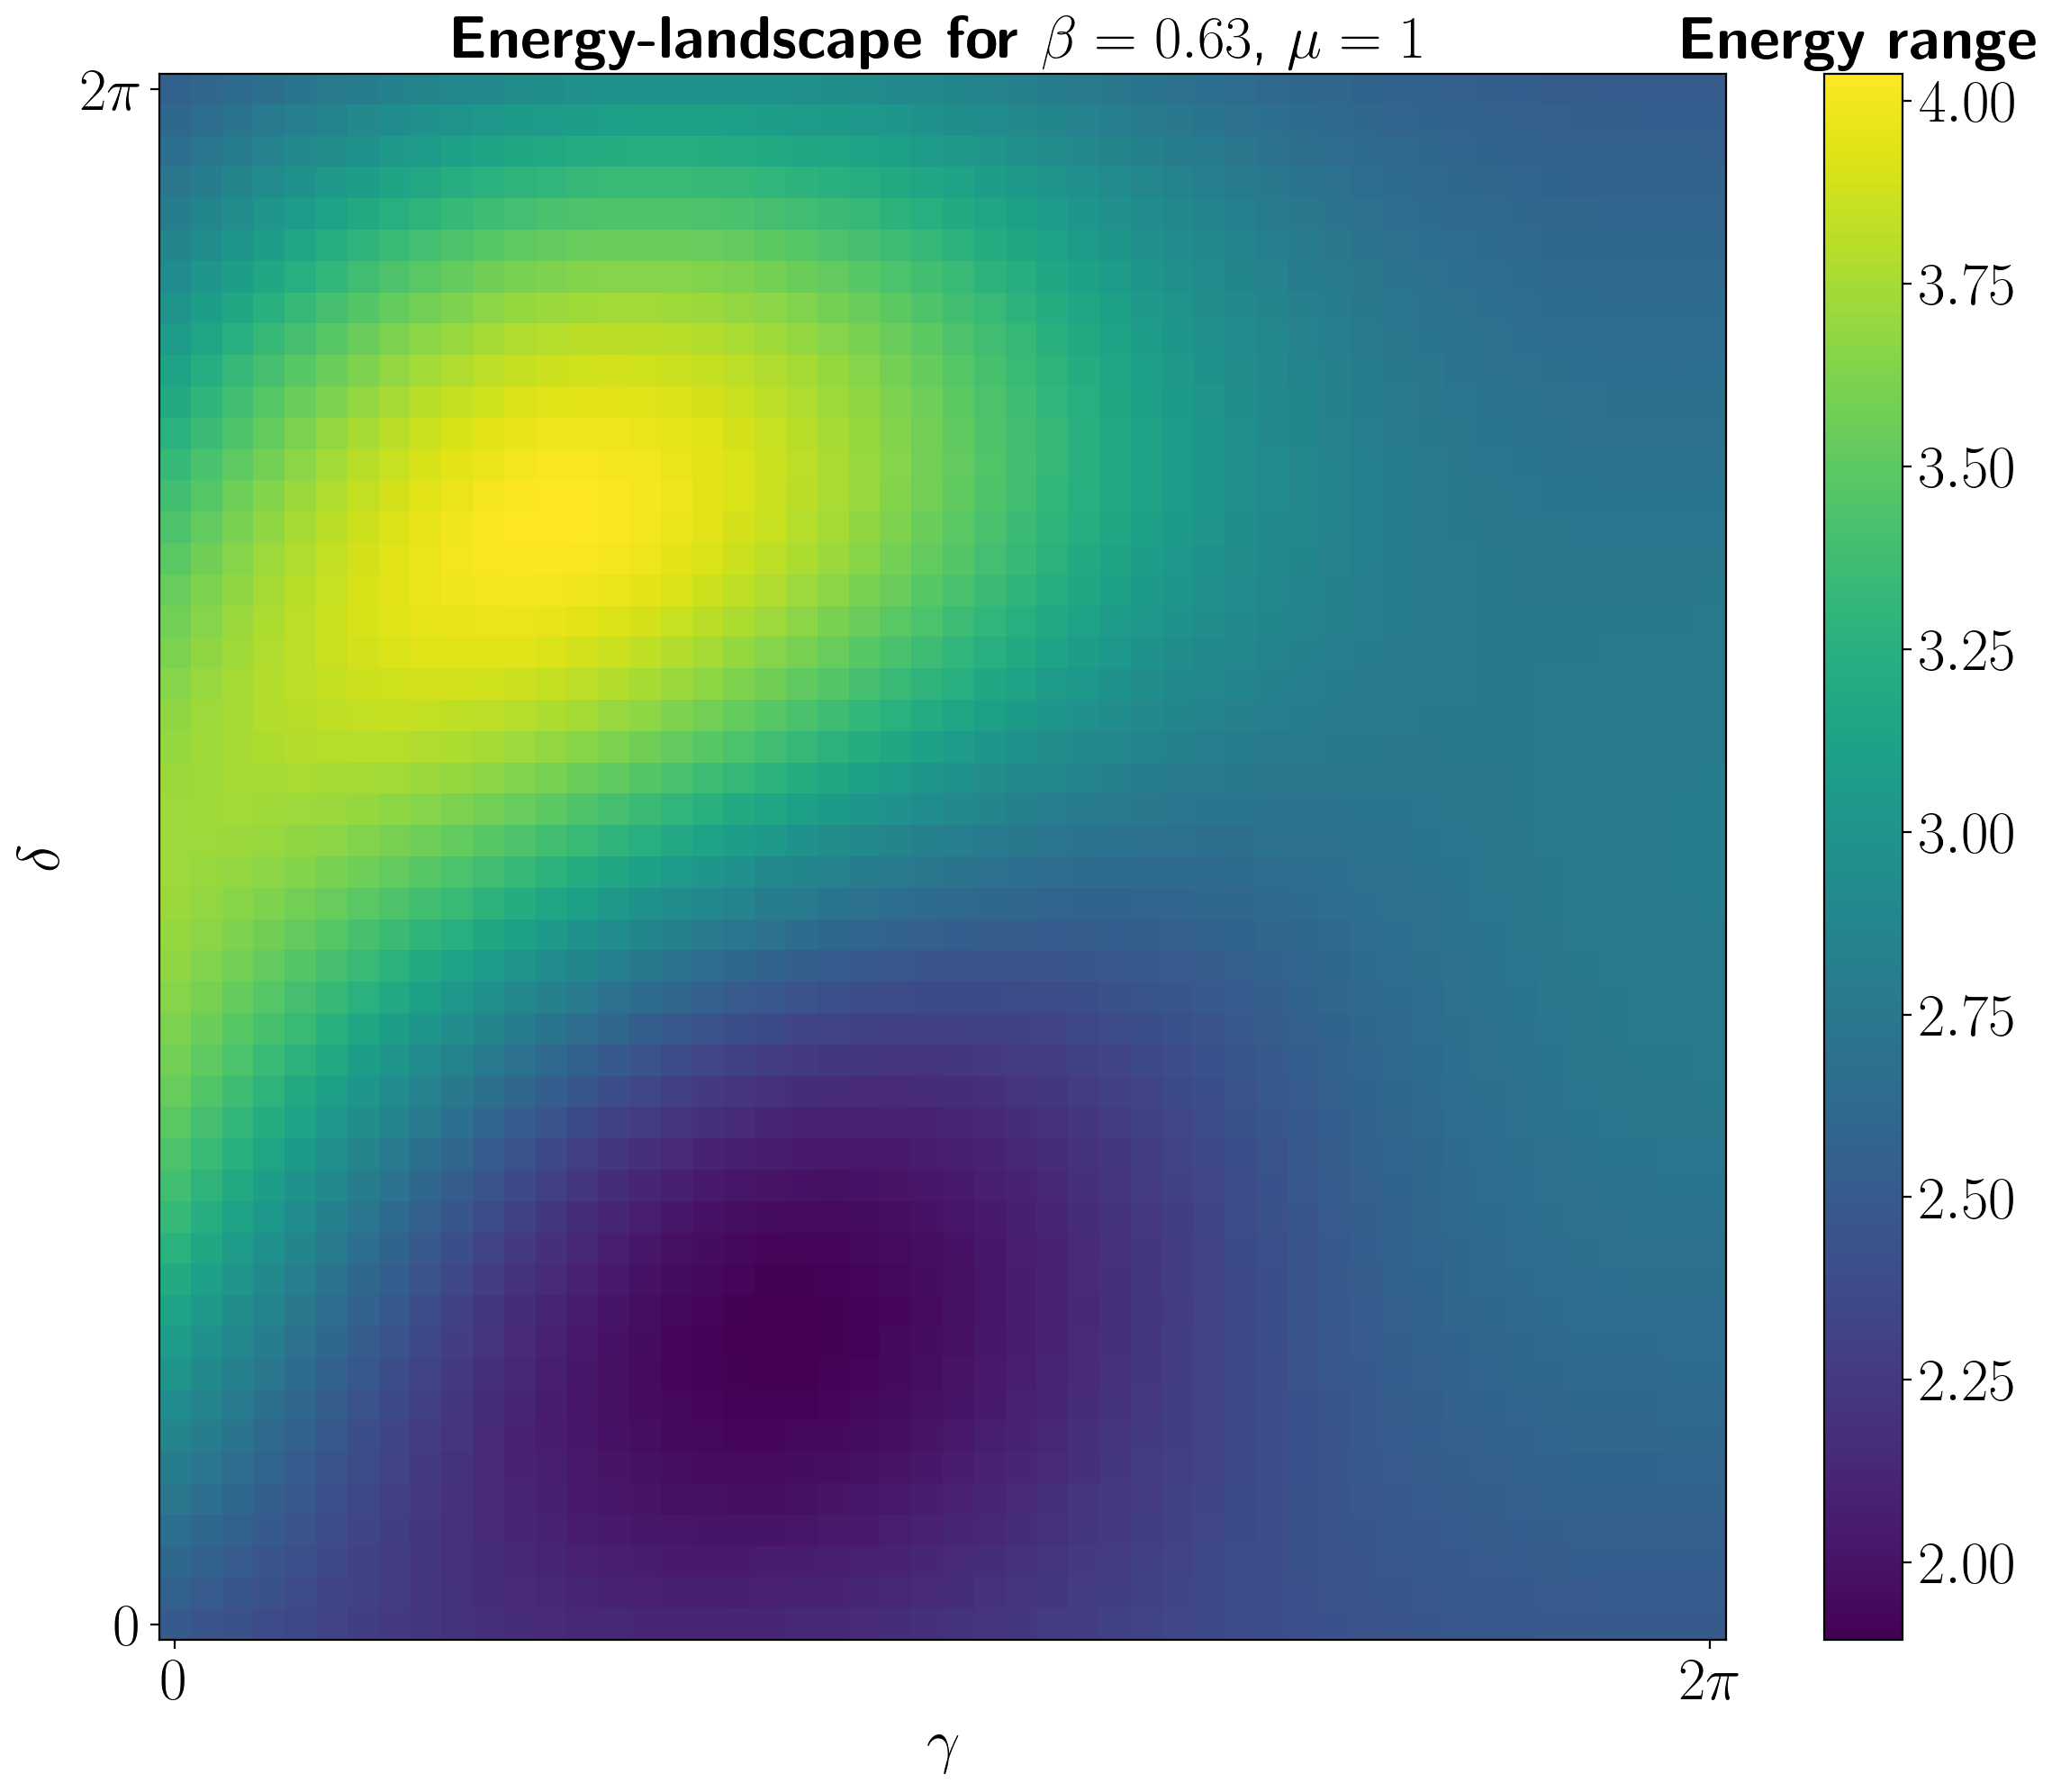

In [18]:
shiftg=gamma_max/(2*gamma_n)
shiftb=delta_max/(2*delta_n)

fig, ax = plt.subplots(figsize=(12,10));

plt.title(r"\textbf{Energy-landscape for }$\beta = %.2f$, $\mu = %.i$" %(i * beta_max/beta_n, mu))

plt.imshow(Elandscape_[:,i,:],
          interpolation='nearest',
          origin='lower',
          extent=[-shiftg,gamma_max+shiftg,-shiftb,delta_max+shiftb], 
          aspect=1)

plt.xticks([0,gamma_max], ['$0$', r'$2\pi$'])
plt.yticks([0,delta_max], ['$0$', r'$2\pi$'])
plt.xlabel('$\gamma$',loc='center')
plt.ylabel(r'$\delta$',loc='center')

clb = plt.colorbar(orientation="vertical")
clb.ax.set_title(r'\textbf{Energy range}')
cmap = plt.get_cmap('bwr')

plt.tight_layout()